In [8]:
from preprocessing.data_loader import load_and_process_data
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

df = load_and_process_data(normalize=False, lab="all", verbose=False)
df['logrms'] = np.log1p(df['rms'])
df.insert(7, 'logrms', df.pop('logrms'))
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,logrms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,0.291750,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,0.222120,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,0.206086,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,0.192252,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,0.189905,1.0,1.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,0.116485,16.0,5.0,3.0,10794.0,150
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,0.118250,16.0,5.0,3.0,10795.0,150
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,0.092956,16.0,5.0,3.0,10796.0,150
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,0.074681,16.0,5.0,3.0,10797.0,150


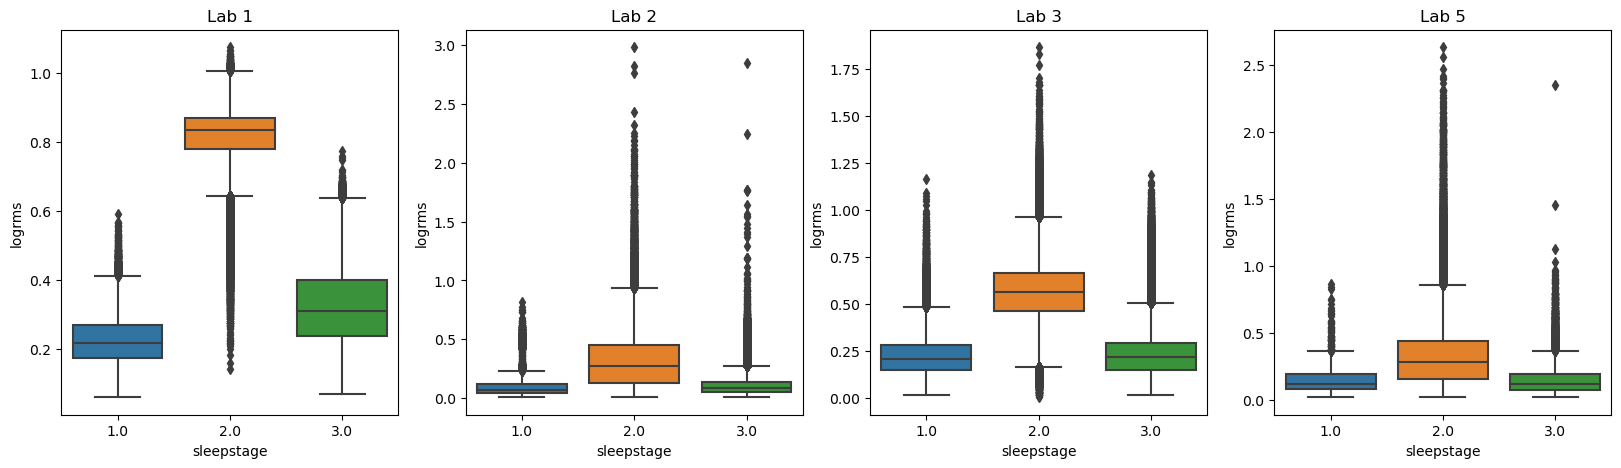

In [13]:
# boxplot of rms with log(1+x) transformation of rms
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, lab in enumerate([1,2,3,5]):
    sns.boxplot(x="sleepstage", y="logrms", data=df[df["lab"] == lab], ax=axs[i])
    axs[i].set_title(f"Lab {lab}")
plt.show()

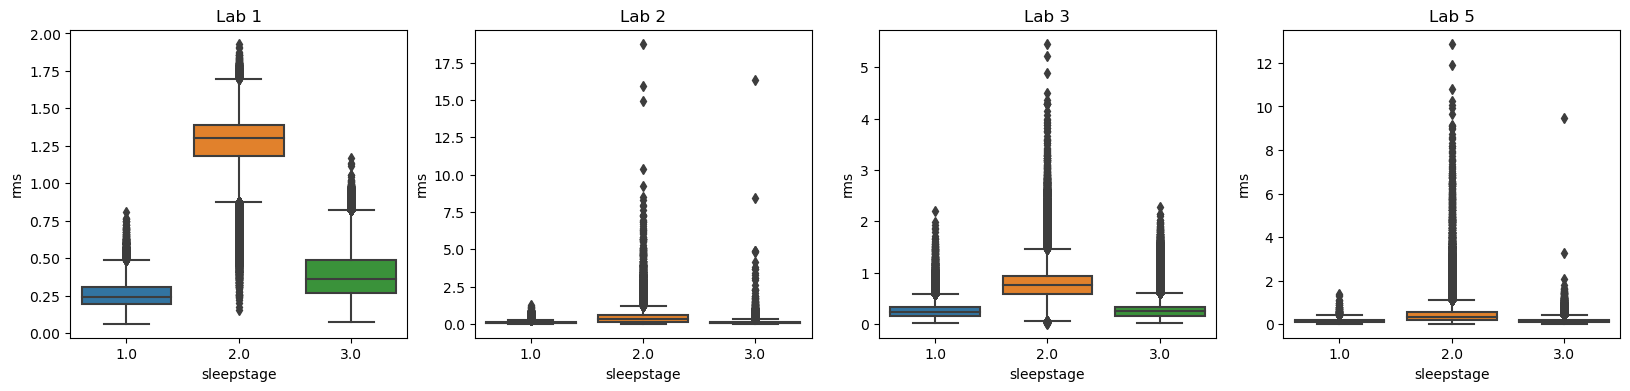

In [14]:
# boxplot of rms for each sleepstage
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
# for lab in [1,2,3,5]
for i, lab in enumerate([1, 2, 3, 5]):
    sns.boxplot(x="sleepstage", y="rms", data=df[df["lab"] == lab], ax=axs[i])
    axs[i].set_title(f"Lab {lab}")
plt.show()

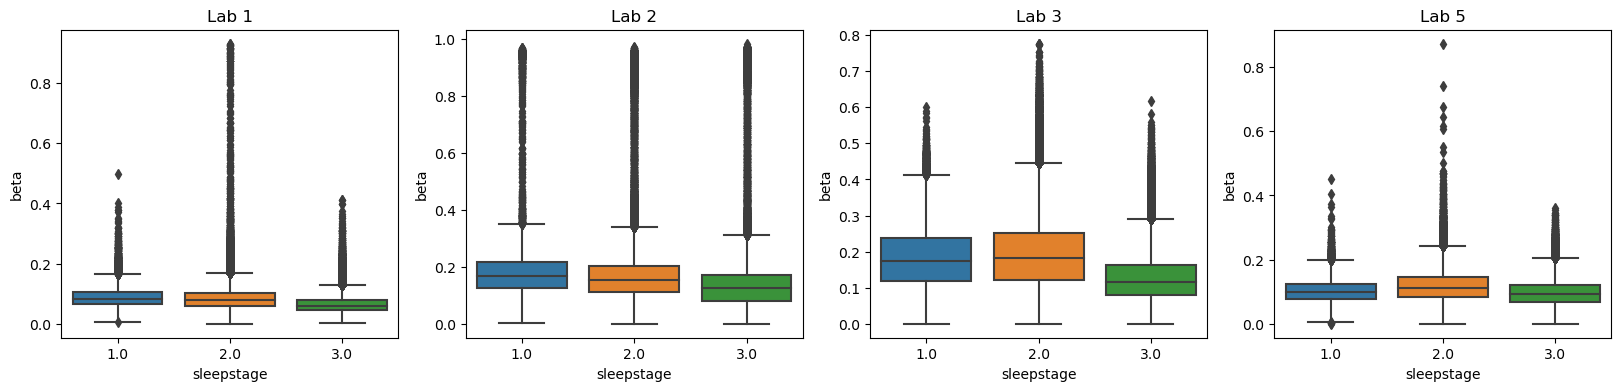

In [15]:
# subplot with 4 plots
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for i, lab in enumerate([1, 2, 3, 5]):
    sns.boxplot(x="sleepstage", y="beta", data=df[df["lab"] == lab], ax=axs[i])
    axs[i].set_title(f"Lab {lab}")
plt.show()

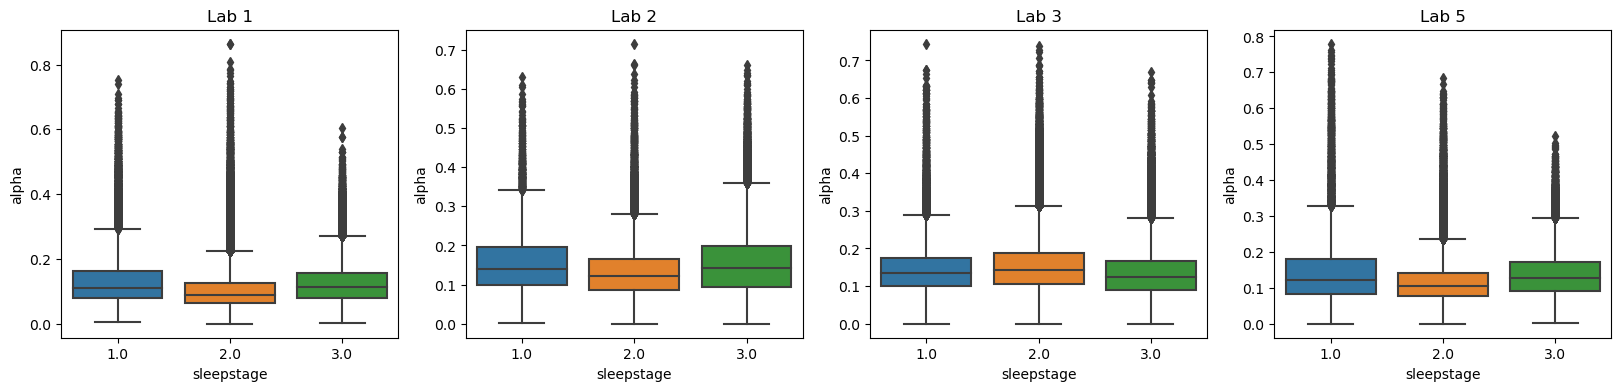

In [16]:
# subplot with 4 plots
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for i, lab in enumerate([1, 2, 3, 5]):
    sns.boxplot(x="sleepstage", y="alpha", data=df[df["lab"] == lab], ax=axs[i])
    axs[i].set_title(f"Lab {lab}")
plt.show()

In [17]:
# df but only for unique id 1
df[df["unique_id"] == 1].describe()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,logrms,mouseID,lab,sleepstage,epoch,unique_id
count,61786.000000,61786.000000,61786.000000,61786.000000,61786.000000,61786.000000,61786.000000,61786.000000,61786.0,61786.0,61786.000000,61786.000000,61786.0
mean,0.269363,0.210071,0.215274,0.089779,0.103109,0.079023,0.837490,0.569680,1.0,1.0,2.389182,32443.121888,1.0
std,0.151512,0.115726,0.103308,0.062961,0.053815,0.033987,0.501705,0.280737,0.0,0.0,0.577360,18742.106671,0.0
min,0.011279,0.006894,0.010021,0.002565,0.007179,0.007748,0.097753,0.093266,1.0,1.0,1.000000,1.000000,1.0
25%,0.154964,0.121161,0.143195,0.046934,0.065488,0.054077,0.331718,0.286470,1.0,1.0,2.000000,16196.250000,1.0
50%,0.238392,0.190446,0.198627,0.074024,0.092816,0.073746,0.803956,0.589982,1.0,1.0,2.000000,32516.500000,1.0
75%,0.353184,0.278636,0.265659,0.114347,0.129059,0.098234,1.332002,0.846727,1.0,1.0,3.000000,48703.750000,1.0
max,0.915824,0.830445,0.791539,0.681486,0.657055,0.353338,1.931405,1.075482,1.0,1.0,3.000000,64801.000000,1.0


In [18]:
# only keep ["slowdelta", "fastdelta", "slowtheta", "fasttheta", "alpha", "beta", "rms", "sleepstage"]
df = df.sort_values("sleepstage")
X = df.drop(columns=['mouseID', 'lab', 'sleepstage', 'epoch', 'unique_id', 'rms'])
print(X)
y = df['sleepstage']
X = X.to_numpy()
y = y.to_numpy()
X = X.T

         slowdelta  fastdelta  slowtheta  fasttheta     alpha      beta  \
1414501   0.232029   0.106786   0.423039   0.070497  0.065967  0.119601   
1366108   0.053300   0.058002   0.119338   0.134870  0.382397  0.335759   
1366107   0.141874   0.164517   0.151594   0.090633  0.255957  0.193364   
1366106   0.082524   0.127908   0.196750   0.063243  0.106882  0.407474   
1366105   0.147006   0.064852   0.195643   0.165620  0.143035  0.263465   
...            ...        ...        ...        ...       ...       ...   
874504    0.306503   0.221909   0.259499   0.092785  0.068656  0.053285   
874505    0.342093   0.257458   0.187680   0.030229  0.055781  0.053483   
874506    0.445019   0.196352   0.161206   0.018247  0.051946  0.047504   
874492    0.348886   0.267119   0.193656   0.026260  0.101511  0.077464   
1958290   0.148903   0.406417   0.183150   0.076505  0.053494  0.073366   

           logrms  
1414501  0.312011  
1366108  0.231847  
1366107  0.236649  
1366106  0.246596  

In [19]:
%%
import pandas as pd

load = np.load('../src/data/lab1.npy')
df = pd.DataFrame(load, columns=['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms', 'sleepstage'])

X = df.drop(columns=['sleepstage'])
#X = (X - X.mean()) / X.std()
print(X.describe().round(2))
y = df['sleepstage']
X = X.to_numpy()
y = y.to_numpy()
X = X.T

UsageError: Cell magic `%%` not found.


In [20]:
%%
# sample more from minority classes so it is balanced
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X.T, y)

X_resampled = X_resampled.T
# Sort the data by class labels
sort_idx = np.argsort(y_resampled)
X_resampled = X_resampled[:, sort_idx]
y_resampled = y_resampled[sort_idx]

n = 85000 * 3
idx = np.random.choice(len(y_resampled), n, replace=False)

sorted_idx = np.sort(idx)
X_resampled = X_resampled[:,sorted_idx]
y_resampled = (y_resampled[sorted_idx]).astype(int)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = torch.tensor(X_resampled).to(device)
X = X_resampled
y = y_resampled

import matplotlib.pyplot as plt
plt.plot(y_resampled)
plt.show()

UsageError: Cell magic `%%` not found.


In [21]:
# sort_idx = np.argsort(y)
# rand_idx = np.random.choice(X.shape[1], 100_000, replace=False)
# X = X[:, rand_idx]
# y = y[rand_idx]

# sort
# sort_idx = np.argsort(y)
# X = X[:, sort_idx]
# y = y[sort_idx]

# Equal amount of data per sleepstage
idx = []
for i in range(1, 4):
    idx.extend(np.random.choice(np.where(y == i)[0], 30000, replace=False))

# Random data
# n = int(len(y) / 7)
# n = 30000 * 3
# idx = np.random.choice(len(y), n, replace=False)

sorted_idx = np.sort(idx)
X = X[:, sorted_idx]
y = (y[sorted_idx]).astype(int)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = torch.tensor(X).to(device)

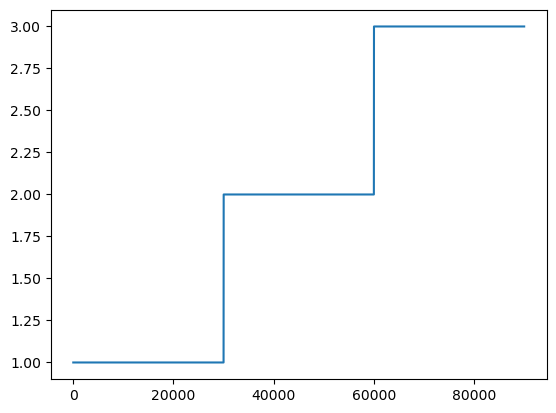

In [22]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [81]:
from tqdm import tqdm
from CGD import AA_model, AA_trainer

K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

C_list = []
S_list = []

# class_weights is 1/number of samples in each class
class_labels = torch.tensor(y, dtype=torch.long).to(device)
unique_labels = torch.unique(class_labels)

# Calculate class weights using PyTorch operations
class_weights = torch.tensor([1 / torch.sum(class_labels == i).item() for i in unique_labels]).to(device)
class_weights = class_weights / torch.sum(class_weights)
#class_weights = torch.tensor([1, 1, 1]).to(device)

# Expand class_weights to match each sample
sample_weights = class_weights[class_labels - 1]

for K in tqdm(K_list):
    model = AA_model.AA(X=data, num_comp=K, class_weights=sample_weights, model='AA', verbose=False)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    loss,_ = AA_trainer.Optimizationloop(model=model,optimizer=optimizer,max_iter=10000,tol=1e-6, disable_output=True)
    C, S = model.get_model_params()
    C_list.append(C)
    S_list.append(S)

100%|██████████| 2/2 [03:43<00:00, 111.71s/it]


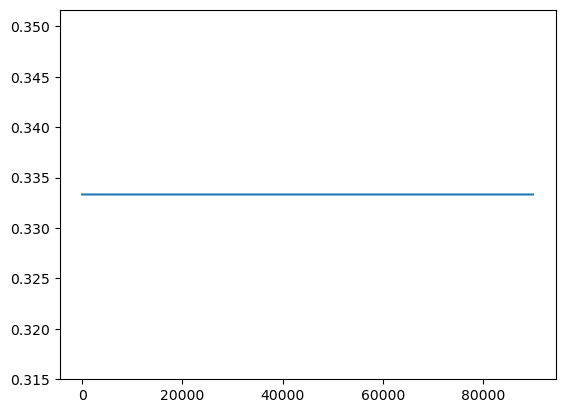

In [82]:
# plot sample weights
plt.plot(sample_weights.cpu().numpy())
plt.show()

In [83]:
# unique sample weights
torch.unique(sample_weights)

# how many of each class
for i in range(1, 4):
    print(f"Class {i}: {torch.sum(class_labels == i).item()}")

Class 1: 30000
Class 2: 30000
Class 3: 30000


In [84]:
X.shape, C.shape, S.shape, y.shape

((7, 90000), (90000, 6), (6, 90000), (90000,))

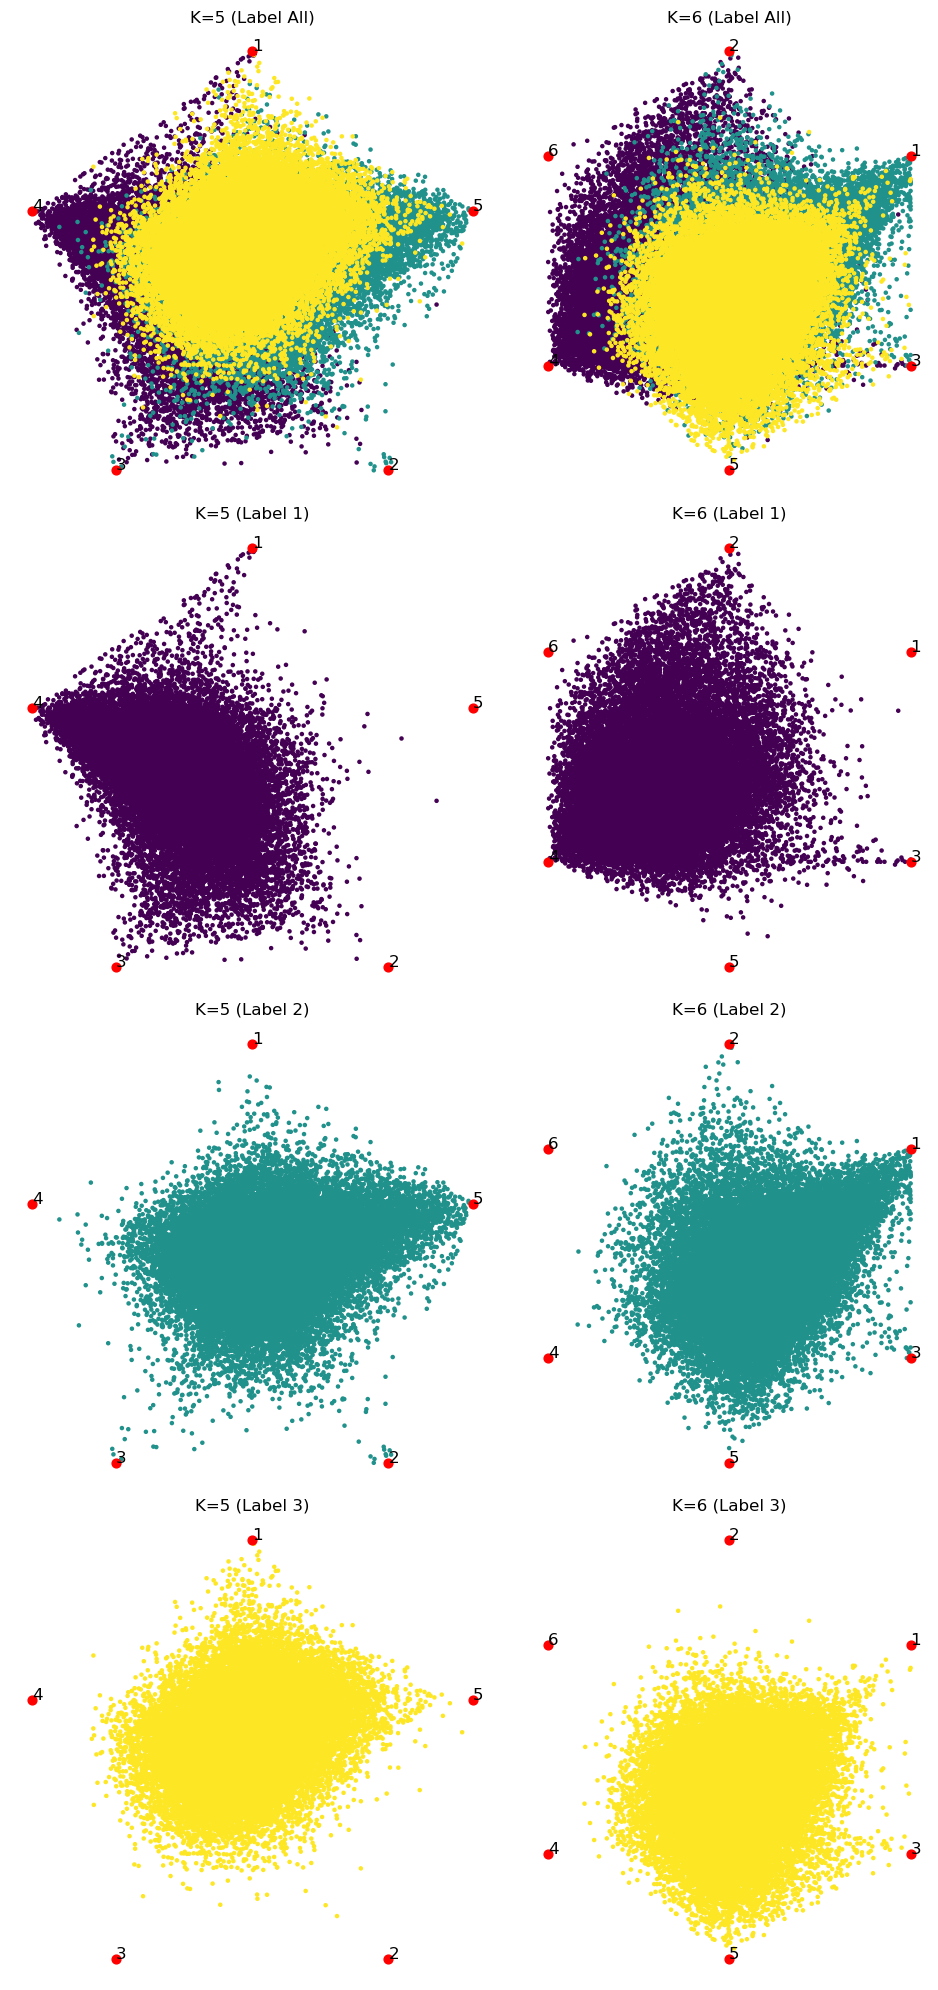

In [85]:
from utils.AA_visualize import *
plot_AA_reconstructed_angles_multiple_sep(X, C_list, S_list, K_list, y, point_size=5)

In [ ]:
pca_plot_AA(X, C_list, S_list, K_list, y)